In [1]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from stateDict import us_state_abbrev
from operator import eq, contains
from scipy.stats import gaussian_kde
import sys
import logging
import signal
from sklearn.neighbors import KernelDensity
from math import radians, cos, sin, asin, sqrt
import utils
from utils import *
from scipy.spatial import cKDTree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import svm

citylist = ['Mountainside,NJ,USA','Springfield,NJ,USA','Morristown,NJ,USA','Westfield,NJ,USA','Plainfield,NJ,USA', 'Summit,NJ,USA', 'South Plainfield,NJ,USA', 'Scotch Plains,NJ,USA', 'Garwood,NJ,USA', 'Kenilworth,NJ,USA']
#citylist = ['Mountainside,NJ,USA']
#load the saved city graphs
graphs = []
for cities in citylist:
    graphs.append(loadGraph(cities))

normfullconnectgraphs = []
for g in range(0,len(graphs)):
    normfullconnectgraphs.append(transformGraphToNormalizedFullyConnected(graphs[g],10))

dfstart = getNodeDataFrame(normfullconnectgraphs[0])
lat = dfstart['x'].values[:,np.newaxis]
longitude = dfstart['y'].values[:,np.newaxis]
for g in range(1,len(graphs)):
    df = getNodeDataFrame(normfullconnectgraphs[g])
    lat = np.concatenate((lat, df['x'].values[:,np.newaxis]))
    longitude = np.concatenate((longitude, df['y'].values[:,np.newaxis]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
wnd = nx.average_neighbor_degree(graphs[0])
array = np.zeros(shape=[graphs[0].__len__(),2])
iter=0
for item in wnd:
    array[iter,0] = item
    array[iter,1] = wnd[item]
    iter+=1

print(array)

[[  6.55779329e+08   1.00000000e+00]
 [  1.05466370e+08   2.00000000e+00]
 [  1.05438722e+08   3.00000000e+00]
 [  1.05461764e+08   2.00000000e+00]
 [  1.05500166e+08   4.00000000e+00]
 [  1.05506826e+08   2.33333333e+00]
 [  1.05438731e+08   2.33333333e+00]
 [  2.45413582e+09   3.00000000e+00]
 [  7.57553162e+08   2.00000000e+00]
 [  1.05436171e+08   2.33333333e+00]
 [  1.05483791e+08   2.33333333e+00]
 [  1.05438735e+08   3.00000000e+00]
 [  1.05440784e+08   3.00000000e+00]
 [  1.05483793e+08   3.00000000e+00]
 [  1.05438739e+08   2.66666667e+00]
 [  1.05488132e+08   3.00000000e+00]
 [  2.54175029e+09   3.00000000e+00]
 [  1.05436187e+08   2.00000000e+00]
 [  1.05461276e+08   2.50000000e+00]
 [  1.05466397e+08   2.00000000e+00]
 [  1.05404958e+08   3.00000000e+00]
 [  1.05429022e+08   3.00000000e+00]
 [  1.05489440e+08   3.00000000e+00]
 [  1.05405470e+08   3.00000000e+00]
 [  1.05492514e+08   3.00000000e+00]
 [  1.05507362e+08   2.50000000e+00]
 [  2.50775074e+08   2.00000000e+00]
 

In [50]:
percentile = np.percentile(array[:,1], 90)

In [51]:
latm, longitudem = getNormalizedLatLongs(getNodeDataFrame(graphs[0]))


In [52]:
wndlatlong = np.concatenate((array,latm,longitudem),axis=1)
percent = np.where(wndlatlong[:,1] >= percentile)

majornodes = wndlatlong[percent]

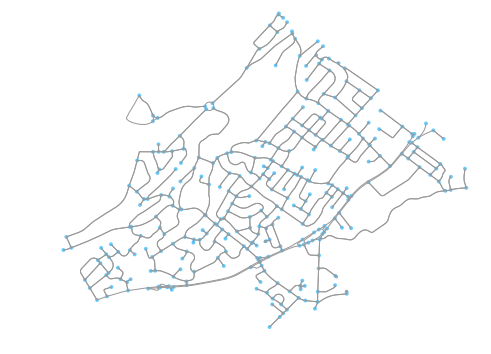

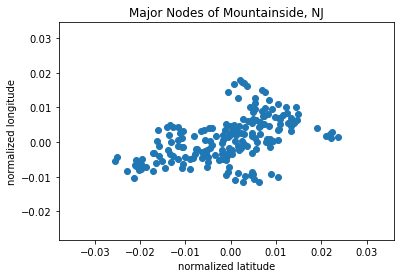

In [53]:
ox.plot_graph(ox.project_graph(graphs[0]))

plt.scatter(majornodes[:,2],majornodes[:,3])
plt.xlabel('normalized latitude')
plt.ylabel('normalized longitude')
plt.title('Major Nodes of Mountainside, NJ')
plt.show()

In [61]:
G=nx.grid_graph(dim=[2,3])
pos=nx.get_node_attributes(G,'pos')
print(pos)
nx.draw(G,pos,hold=None,node_size=10)
plt.show()


{}


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:136: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

NetworkXError: Node (0, 0) has no position.